# The magnetic field due to the Stanford Bunny

The Standford Bunny is a classic example of a non-convex surface which is commonly used as a demonstrator object in 3D printing and 3D graphics. The original stl file contains ~100k polygons. 

As the magnetic field routines loop over each polygon in the mesh in Python the loops are slow. This particular example uses a version of the mesh with 500 polygons. A version with 10k vertices is also included in the example folder.

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing package from pypi')
    %pip install pymagnet -q
    !mkdir stl
    print("Getting stl files")
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/Stanford_Bunny_10000.stl -O stl/Stanford_Bunny_10000.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/Stanford_Bunny_500.stl -O stl/Stanford_Bunny_500.stl -q
    print("Done.")
else:
    print('Not running on CoLab.')

Not running on CoLab.


In [2]:
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'
import pymagnet as pm
import numpy as np

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
pm.reset()

mask_magnet = False # mask values inside a magnet
show_magnets = True  # draw magnet in plots

mesh_file = "Stanford_Bunny_500.stl"


center = (0, 0, -10)

m_mesh = pm.magnets.Mesh(
    filename = 'stl/'+ mesh_file,
    Jr=1.0,
    center=center,
    theta=0,
    phi=0,
    alpha=225,
    beta=0,
    gamma=0,
)

print(f"{mesh_file} has {len(m_mesh.mesh_vectors)} simplexes to calculate over")

fig = pm.plots.plot_magnet()

3D Render
![Slice Plot](img/bunny_slice.png)

In [4]:
fig, slice_cache, data_objects = pm.plots.slice_quickplot(
    cmax=0.4,
    num_levels=9,
    num_points=40,
    opacity=0.7,
    num_arrows=10,
    cone_opacity=0.1,
    show_magnets=True,
    max1=70,
    max2=70,
    slice_value=0.0,
)

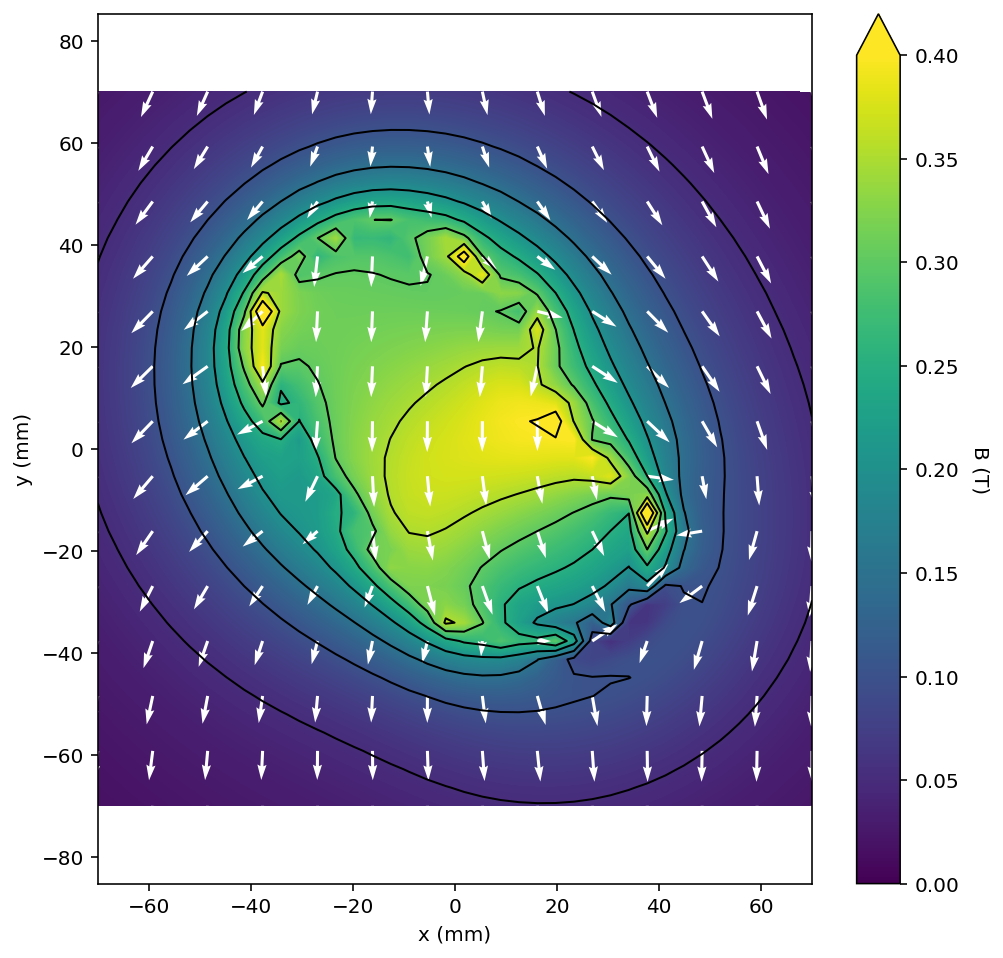

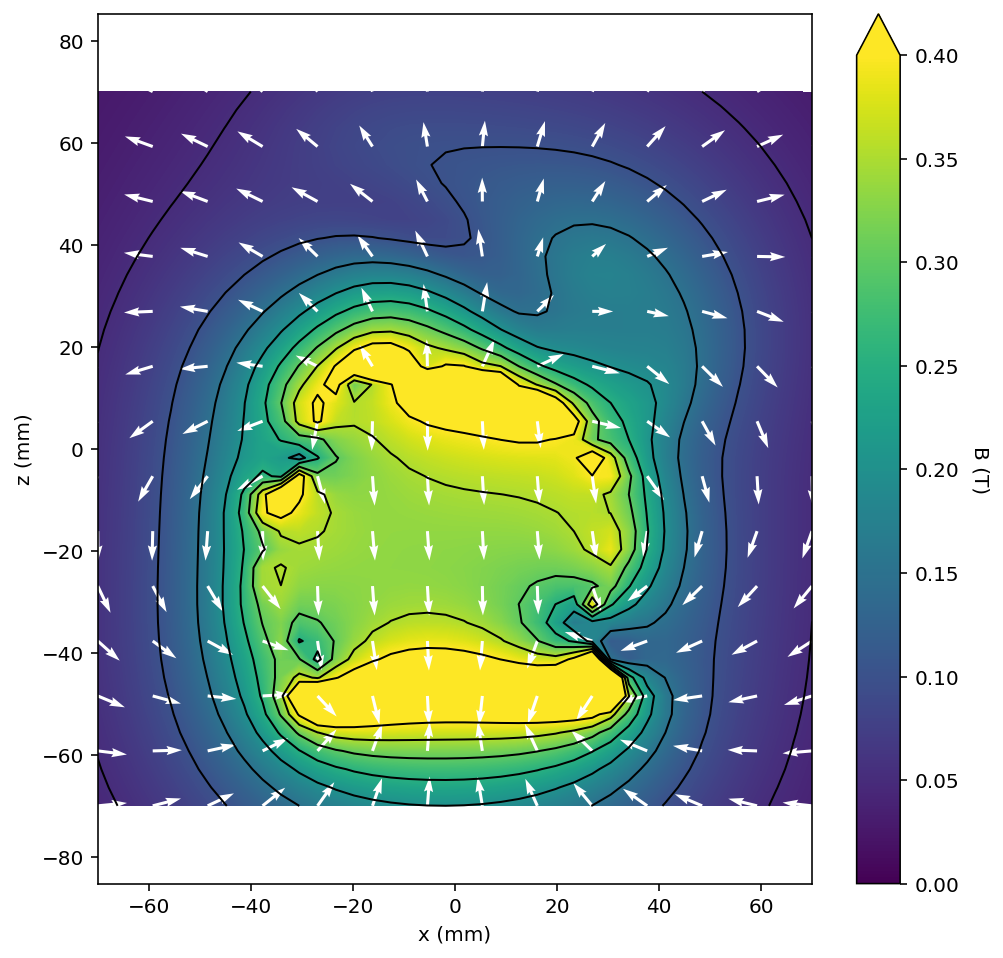

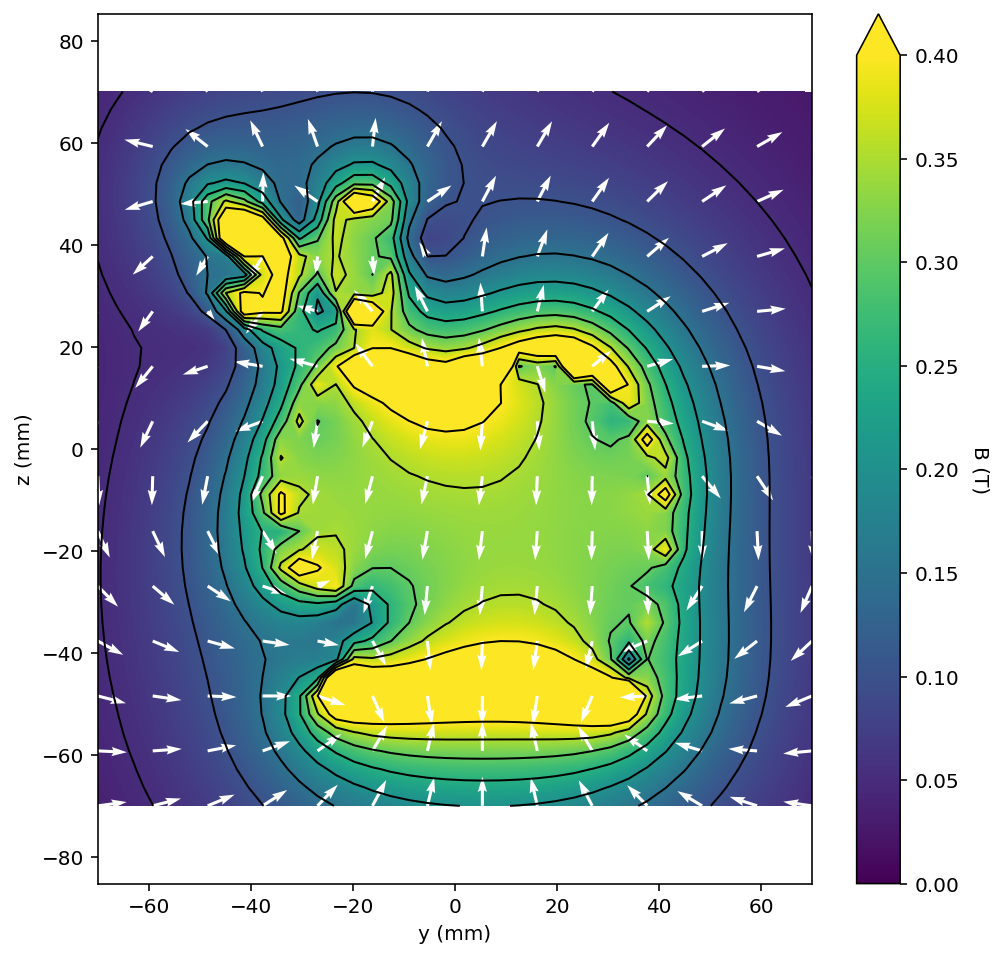

In [5]:
for plane in slice_cache.keys():
    pm.plots.plot_3D_contour(slice_cache[plane]['points'], slice_cache[plane]['field'], plane,
                             cmin = 0,
                             cmax=0.4,
                             num_levels=9,
                             num_arrows = 11,
#                              vector_color = 'k'
#                              plot_type="streamplot",
    #                          stream_color= 'vertical'
                            )


3D Render
![Slice Plot](img/bunny_volume.png)

In [ ]:
fig_vol, vol_cache, data_objects = pm.plots.volume_quickplot(cmin=0.0,
                                    cmax=0.5,
                                    opacity=0.3,
                                    magnet_opacity=1.0,
                                    no_caps=True,
                                    num_levels=6,
                                    num_points=30,
                                    show_magnets = True,
                                    xmax = 70,
                                    ymax = 70,
                                    zmax = 70,
                                    unit = 'mm',
                                    opacityscale = 'normal',
#                                     isomin=0.05,
#                                     isomax=0.5,
                                   )
